In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
takimlar = ['Galatasaray', 'Fenerbahçe', 'Beşiktaş', 'Trabzonspor', 'Bursaspor', 
            'Antalyaspor', 'Göztepe', 'Sivasspor', 'Kayserispor', 'İstanbul BB', 
            'Yeni Malatyaspor', 'Konyaspor', 'Gençlerbirliği', 'Denizlispor', 
            'Gaziantep FK', 'Alanyaspor', 'Hatayspor', 'Rizespor', 'Ankaragücü', 
            'Kasımpaşa']

skorlar = [0, 1, 2, 3, 4, 5, 6, 7]

n = 1000

df = pd.DataFrame({
    'Maç No.': np.arange(1, n+1),
    'Tarih': pd.date_range(start='2022-03-01', periods=n, freq='D'),
    'Saat': pd.date_range(start='18:00:00', periods=n, freq='3H').strftime('%H:%M:%S'),
    'Takım 1': np.random.choice(takimlar, n),
    'Takım 2': np.random.choice(takimlar, n),
    'Skor Takım 1': np.random.choice(skorlar, n),
    'Skor Takım 2': np.random.choice(skorlar, n),
    'Toplam Şut': np.random.randint(0, 20, n),
    'Korner Sayısı': np.random.randint(0, 10, n),
    'Sarı Kart Sayısı': np.random.randint(0, 4, n),
    'Kırmızı Kart Sayısı': np.random.randint(0, 2, n)
})

df['Toplam Gol'] = df['Skor Takım 1'] + df['Skor Takım 2']



df.head()

,Maç No.,Tarih,Saat,Takım 1,Takım 2,Skor Takım 1,Skor Takım 2,Toplam Şut,Korner Sayısı,Sarı Kart Sayısı,Kırmızı Kart Sayısı,Toplam Gol
0,1,2022-03-01,18:00:00,Hatayspor,Kasımpaşa,2,5,5,3,1,1,7
1,2,2022-03-02,21:00:00,Fenerbahçe,Denizlispor,0,0,6,4,3,1,0
2,3,2022-03-03,00:00:00,Ankaragücü,Alanyaspor,1,6,11,2,3,1,7
3,4,2022-03-04,03:00:00,Beşiktaş,Antalyaspor,2,7,14,6,1,0,9
4,5,2022-03-05,06:00:00,Denizlispor,Kasımpaşa,1,0,11,2,2,1,1


# Veri Analizi 

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Maç No.,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
Skor Takım 1,1000.0,3.561,2.249742,0.0,2.00,4.0,6.00,7.0
Skor Takım 2,1000.0,3.468,2.258335,0.0,1.00,4.0,5.00,7.0
Toplam Şut,1000.0,9.238,5.827290,0.0,4.00,9.0,14.25,19.0
Korner Sayısı,1000.0,4.542,2.844350,0.0,2.00,5.0,7.00,9.0
Sarı Kart Sayısı,1000.0,1.488,1.105929,0.0,0.00,2.0,2.00,3.0
Kırmızı Kart Sayısı,1000.0,0.509,0.500169,0.0,0.00,1.0,1.00,1.0
Toplam Gol,1000.0,7.029,3.130489,0.0,5.00,7.0,9.00,14.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Maç No.              1000 non-null   int32         
 1   Tarih                1000 non-null   datetime64[ns]
 2   Saat                 1000 non-null   object        
 3   Takım 1              1000 non-null   object        
 4   Takım 2              1000 non-null   object        
 5   Skor Takım 1         1000 non-null   int32         
 6   Skor Takım 2         1000 non-null   int32         
 7   Toplam Şut           1000 non-null   int32         
 8   Korner Sayısı        1000 non-null   int32         
 9   Sarı Kart Sayısı     1000 non-null   int32         
 10  Kırmızı Kart Sayısı  1000 non-null   int32         
 11  Toplam Gol           1000 non-null   int32         
dtypes: datetime64[ns](1), int32(8), object(3)
memory usage: 62.6+ KB


In [5]:
df.corr()

,Maç No.,Skor Takım 1,Skor Takım 2,Toplam Şut,Korner Sayısı,Sarı Kart Sayısı,Kırmızı Kart Sayısı,Toplam Gol
Maç No.,1.000000,-0.035373,0.013378,0.039047,0.052263,0.008048,0.009240,-0.015770
Skor Takım 1,-0.035373,1.000000,-0.035572,-0.027985,-0.018625,0.004117,0.024420,0.692994
Skor Takım 2,0.013378,-0.035572,1.000000,-0.022164,-0.025815,0.005457,-0.063108,0.695836
Toplam Şut,0.039047,-0.027985,-0.022164,1.000000,0.005919,0.016753,-0.044009,-0.036101
Korner Sayısı,0.052263,-0.018625,-0.025815,0.005919,1.000000,-0.061574,-0.013986,-0.032008
Sarı Kart Sayısı,0.008048,0.004117,0.005457,0.016753,-0.061574,1.000000,0.008339,0.006895
Kırmızı Kart Sayısı,0.009240,0.024420,-0.063108,-0.044009,-0.013986,0.008339,1.000000,-0.027976
Toplam Gol,-0.015770,0.692994,0.695836,-0.036101,-0.032008,0.006895,-0.027976,1.000000


In [6]:
df.var()

C:\Users\murat\AppData\Local\Temp\ipykernel_13420\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


Maç No.                83416.666667
Skor Takım 1               5.061340
Skor Takım 2               5.100076
Toplam Şut                33.957313
Korner Sayısı              8.090326
Sarı Kart Sayısı           1.223079
Kırmızı Kart Sayısı        0.250169
Toplam Gol                 9.799959
dtype: float64

In [7]:
df.isnull().sum()

Maç No.                0
Tarih                  0
Saat                   0
Takım 1                0
Takım 2                0
Skor Takım 1           0
Skor Takım 2           0
Toplam Şut             0
Korner Sayısı          0
Sarı Kart Sayısı       0
Kırmızı Kart Sayısı    0
Toplam Gol             0
dtype: int64

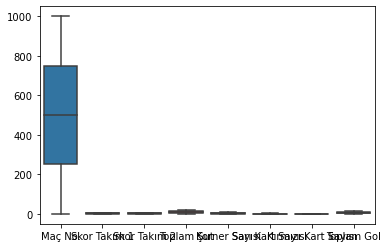

In [8]:
sns.boxplot(data=df);

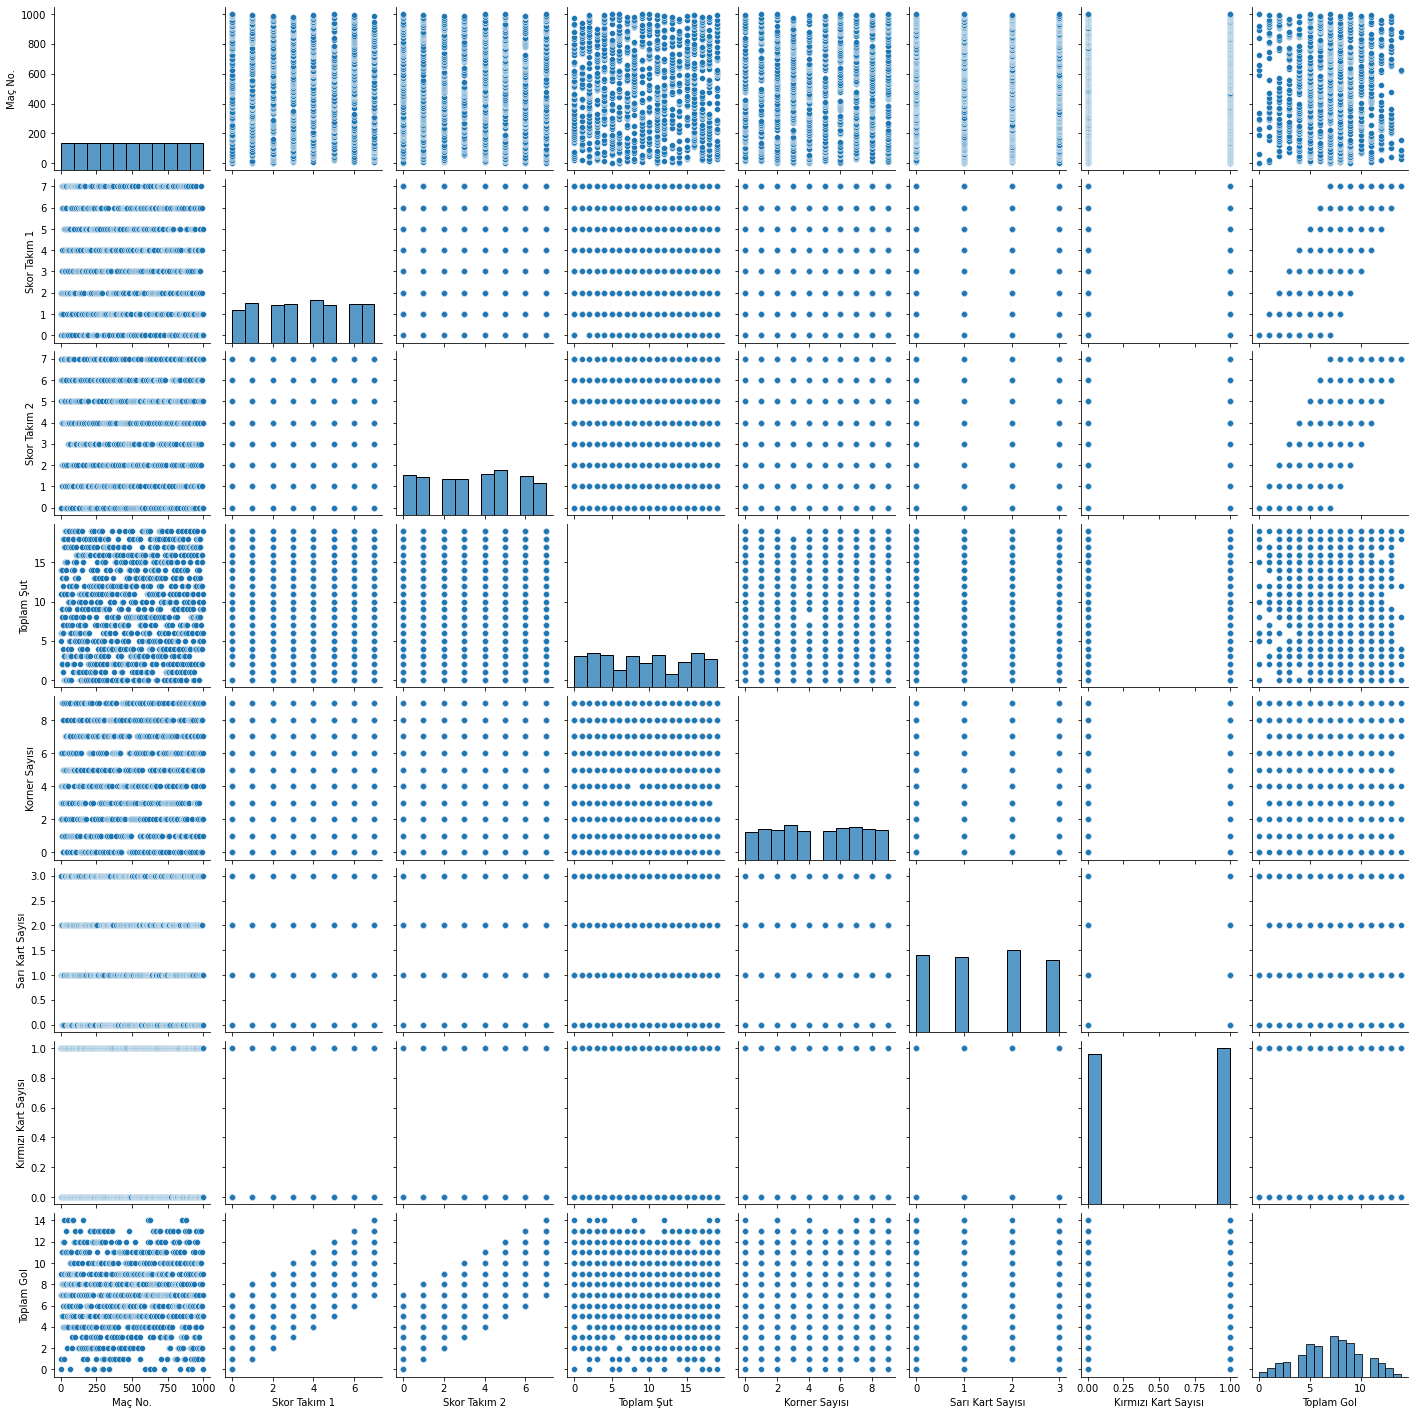

In [9]:
sns.pairplot(data=df);

# Veri Ön İşleme

In [10]:
df.head()

,Maç No.,Tarih,Saat,Takım 1,Takım 2,Skor Takım 1,Skor Takım 2,Toplam Şut,Korner Sayısı,Sarı Kart Sayısı,Kırmızı Kart Sayısı,Toplam Gol
0,1,2022-03-01,18:00:00,Hatayspor,Kasımpaşa,2,5,5,3,1,1,7
1,2,2022-03-02,21:00:00,Fenerbahçe,Denizlispor,0,0,6,4,3,1,0
2,3,2022-03-03,00:00:00,Ankaragücü,Alanyaspor,1,6,11,2,3,1,7
3,4,2022-03-04,03:00:00,Beşiktaş,Antalyaspor,2,7,14,6,1,0,9
4,5,2022-03-05,06:00:00,Denizlispor,Kasımpaşa,1,0,11,2,2,1,1


In [11]:
# Kategorik değişkenleri sayısal değişkenlere çevirelim.

df['Takım 1'].unique()
df['Takım 1'] = df['Takım 1'].map({
    'Konyaspor':0, 'Denizlispor':1, 'Kayserispor':2, 'Göztepe':3, 'Gençlerbirliği':4, 'Rizespor':5, 'Bursaspor':6, 'Fenerbahçe':7, 'Kasımpaşa':8, 'Sivasspor':9, 'Alanyaspor':10,
    'Trabzonspor':11, 'Gaziantep FK':12, 'Beşiktaş':13, 'Galatasaray':14, 'Antalyaspor':15, 'İstanbul BB':16, 'Ankaragücü':17, 'Yeni Malatyaspor':18, 'Hatayspor':19
})

df['Takım 2'] = df['Takım 2'].map({
    'Konyaspor':0, 'Denizlispor':1, 'Kayserispor':2, 'Göztepe':3, 'Gençlerbirliği':4, 'Rizespor':5, 'Bursaspor':6, 'Fenerbahçe':7, 'Kasımpaşa':8, 'Sivasspor':9, 'Alanyaspor':10,
    'Trabzonspor':11, 'Gaziantep FK':12, 'Beşiktaş':13, 'Galatasaray':14, 'Antalyaspor':15, 'İstanbul BB':16, 'Ankaragücü':17, 'Yeni Malatyaspor':18, 'Hatayspor':19
})
df.head()

,Maç No.,Tarih,Saat,Takım 1,Takım 2,Skor Takım 1,Skor Takım 2,Toplam Şut,Korner Sayısı,Sarı Kart Sayısı,Kırmızı Kart Sayısı,Toplam Gol
0,1,2022-03-01,18:00:00,19,8,2,5,5,3,1,1,7
1,2,2022-03-02,21:00:00,7,1,0,0,6,4,3,1,0
2,3,2022-03-03,00:00:00,17,10,1,6,11,2,3,1,7
3,4,2022-03-04,03:00:00,13,15,2,7,14,6,1,0,9
4,5,2022-03-05,06:00:00,1,8,1,0,11,2,2,1,1


In [12]:
# Tarih değişkenini modele uygun hale getirelim.
from datetime import datetime
import time

# her bir tarihi unix zaman damgasına dönüştürelim.
unix_zaman_damgalari = []
for tarih in df['Tarih']:
    unix_zaman_damgasi = int(tarih.timestamp())
    unix_zaman_damgalari.append(unix_zaman_damgasi)
df['Tarih'] = unix_zaman_damgalari
df.head()

,Maç No.,Tarih,Saat,Takım 1,Takım 2,Skor Takım 1,Skor Takım 2,Toplam Şut,Korner Sayısı,Sarı Kart Sayısı,Kırmızı Kart Sayısı,Toplam Gol
0,1,1646092800,18:00:00,19,8,2,5,5,3,1,1,7
1,2,1646179200,21:00:00,7,1,0,0,6,4,3,1,0
2,3,1646265600,00:00:00,17,10,1,6,11,2,3,1,7
3,4,1646352000,03:00:00,13,15,2,7,14,6,1,0,9
4,5,1646438400,06:00:00,1,8,1,0,11,2,2,1,1


In [13]:
# Skor Takım 2 isimli değişkendeki eksik değerleri işleyelim.
df['Skor Takım 2'].fillna(df['Skor Takım 2'].mean(), inplace=True)

In [14]:
# Saat değişkenini eleyelim.
df.drop('Saat', axis=1, inplace=True)

In [15]:
df.head()

,Maç No.,Tarih,Takım 1,Takım 2,Skor Takım 1,Skor Takım 2,Toplam Şut,Korner Sayısı,Sarı Kart Sayısı,Kırmızı Kart Sayısı,Toplam Gol
0,1,1646092800,19,8,2,5,5,3,1,1,7
1,2,1646179200,7,1,0,0,6,4,3,1,0
2,3,1646265600,17,10,1,6,11,2,3,1,7
3,4,1646352000,13,15,2,7,14,6,1,0,9
4,5,1646438400,1,8,1,0,11,2,2,1,1


# ---------------------------------------------------------------

# Hipotez Testleri

### Takım 1 'in skor ortalaması Takım 2 'nin skor ortalamasından azdır.
### Takım 1 'in skor ortalaması Takım 2 'nin skor ortalamasından az değildir.

In [16]:
# Örneklemleri oluşturalım.
takim1 = df.groupby('Takım 1')['Skor Takım 1'].mean()
takim2 = df.groupby('Takım 2')['Skor Takım 2'].mean()

### Hangi hipotez testini seçeceğimize varsayımlar üzerinden karar verelim.

In [17]:
# Normallik Varsayımı
from scipy.stats import shapiro
alpha = 0.05

stat, p_value = shapiro(takim1)
if p_value < alpha:
    print('takim1 isimli örneklem normal dağılmıyor.')
else:
    print('takim2 isimli örneklem normal dağılıyor.')
    
stat, p_value = shapiro(takim2)
if p_value < alpha:
    print('takim2 isimli örneklem normal dağılmıyor.')
else:
    print('takim2 isimli örneklem normal dağılıyor.')

takim2 isimli örneklem normal dağılıyor.
takim2 isimli örneklem normal dağılıyor.


### Örneklemler normal dağıldığı için diğer varsayımlara bakmamıza gerek yok. Parametrik test yapabiliriz. Fakat hangi parametrik testi yapacağımıza hipoteze göre karar vereceğiz. Bu hipotezde iki örneklem t-testi yapabiliriz. Bu test, iki örneklemin ortalamaları arasındaki farkın anlamlı olup olmadığını belirlemek için kullanılır.

In [18]:
from scipy.stats import ttest_ind
alpha = 0.05

stat, p_value = ttest_ind(takim1, takim2)
if p_value < alpha:
    print('H0 hipotezi reddedilir. Takım 1"in skor ortalaması Takım 2"nin skor ortalamasından az değildir.')
else:
    print('H0 hipotezi reddedilmez. Takım 1"in skor ortalaması Takım 2"nin skor ortalamasından azdır.')

H0 hipotezi reddedilmez. Takım 1"in skor ortalaması Takım 2"nin skor ortalamasından azdır.


In [19]:
# Hipotez testi sonucunun sağlamasını yapalım.
takim1.mean(), takim2.mean()

(3.5456948419479573, 3.460818084528455)

# --------------------------------

In [20]:
df.head()

,Maç No.,Tarih,Takım 1,Takım 2,Skor Takım 1,Skor Takım 2,Toplam Şut,Korner Sayısı,Sarı Kart Sayısı,Kırmızı Kart Sayısı,Toplam Gol
0,1,1646092800,19,8,2,5,5,3,1,1,7
1,2,1646179200,7,1,0,0,6,4,3,1,0
2,3,1646265600,17,10,1,6,11,2,3,1,7
3,4,1646352000,13,15,2,7,14,6,1,0,9
4,5,1646438400,1,8,1,0,11,2,2,1,1


### H0: Maçta kırmızı kart görme sayısı toplam gol sayısını etkilemez.
### H1: Maçta kırmızı kart görme sayısı toplam gol sayısını etkiler.

In [21]:
kirmizi_var = df.loc[df['Kırmızı Kart Sayısı'] == 1, 'Toplam Gol']
kirmizi_yok = df.loc[df['Kırmızı Kart Sayısı'] == 0, 'Toplam Gol']

### Hangi hipotez testini kullanacağımıza varsayımlar üzerinden karar vereceğiz.

In [22]:
# Normallik varsayımı
from scipy.stats import shapiro
alpha = 0.05

stat, p_value = shapiro(kirmizi_var)
if p_value < alpha:
    print('kirmizi_var isimli örneklem normal dağılmıyor.')
else:
    print('kirmizi_var isimli örneklem normal dağılıyor.')

stat, p_value = shapiro(kirmizi_yok)
if p_value < alpha:
    print('kirmizi_yok isimli örneklem normal dağılmıyor.')
else:
    print('kirmizi_var isimli örneklem normal dağılıyor.')

kirmizi_var isimli örneklem normal dağılmıyor.
kirmizi_yok isimli örneklem normal dağılmıyor.


In [23]:
len(kirmizi_var), len(kirmizi_yok)

(509, 491)

### Örneklemler normal dağılmadığı için non-parametrik test yapacağız. Hangi hipotez testini yapacağımıza senaryomuza göre karar vereceğiz. Spearman Testini kullanabiliriz. İki değişken arasındaki ilişkiyi test etmek için kullanılır.

In [24]:
from scipy.stats import spearmanr
alpha = 0.05

stat, p_value = spearmanr(kirmizi_var[0:300], kirmizi_yok[0:300])
if p_value < alpha:
    print('H0 hipotezi reddedilir. Maçta kırmızı kart görme sayısı toplam gol sayısını etkiler.')
else:
    print('H0 hipotezi reddedilmez. Maçta kırmızı kart görme sayısı toplam gol sayısını etkilemez.')

H0 hipotezi reddedilmez. Maçta kırmızı kart görme sayısı toplam gol sayısını etkilemez.


In [25]:
# hipotez testi sonucunun sağlaması
kirmizi_var.mean(), kirmizi_yok.mean()

(6.943025540275049, 7.1181262729124235)

# ----------------------------------------------------

# Model İşlemleri

In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

### Hangi modeli kuracağımıza bağımlı değişkenin normal dağılıp dağılmadığına göre karar vereceğiz. Eğer bağımlı değişken normal dağılıyorsa, doğrusal model kuracağız. Eğer normal dağılmıyorsa doğrusal olmayan model kuracağız.

In [27]:
# bağımlı ve bağımsız değişkenleri belirleyelim.
X = df.drop('Toplam Gol', axis=1)
y = df['Toplam Gol']

In [29]:
from scipy.stats import shapiro
alpha = 0.05

stat, p_value = shapiro(y)
if p_value < alpha:
    print('Bağımlı değişken normal dağılmıyor.')
else:
    print('Bağımlı değişken normal dağılıyor.')

Bağımlı değişken normal dağılmıyor.


### Bağımlı değişken normal dağılmadığını için doğrusal olmayan model kuracağız. KNN modeli kurabiliriz.

In [31]:
# eğitim ve test setlerimizi ayıralım.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### İlk önce modelimiz için en iyi hiperparametreleri seçelim. Normalde ilk model kurulur. Daha sonra modelin performansını optimize etmek için hiperparametre seçim işlemi yapılır. Fakat biz bu örnekte knn algoritması üzerinde çalıştığımız için direk knn algoritmasını kuracağız.

In [36]:
params = {
    'n_neighbors': range(1, 12),
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'leaf_size': [10, 20, 30, 40, 50],
}

grid = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=params, cv=5).fit(X_train, y_train)

print('Best Params: ', grid.best_params_)
print('Best Score: ', grid.best_score_)

Best Params:  {'algorithm': 'brute', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Best Score:  -0.10684225994908711


In [37]:
# En iyi random_state değerini bulalım.
random_states = [0, 10, 20, 42, 60, 80, 100]

for element in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=element)
    model = KNeighborsRegressor(algorithm='brute', leaf_size=10, metric='manhattan', n_neighbors=11, weights='uniform').fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f'random_state={element} için R-Kare değeri: {r2}')

random_state=0 için R-Kare değeri: -0.07674312948900486
random_state=10 için R-Kare değeri: -0.02804260653653956
random_state=20 için R-Kare değeri: -0.12908233933528734
random_state=42 için R-Kare değeri: -0.009167203165179716
random_state=60 için R-Kare değeri: -0.024715459500935122
random_state=80 için R-Kare değeri: -0.0796492117943648
random_state=100 için R-Kare değeri: -0.09543005936223259


### En iyi hiperparametrelere göre modelimizi kuralım.

In [46]:
# eğitim ve test setlerini ayıralım.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# modeli oluşturalım ve eğitelim.
model = KNeighborsRegressor(algorithm='brute', leaf_size=10, metric='manhattan', n_neighbors=11, weights='uniform')
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='brute', leaf_size=10, metric='manhattan',
                    n_neighbors=11)

In [44]:
# tahmin yapalım.
y_pred = model.predict(X_test)

In [43]:
# modeli değerlendirelim.
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R-Kare Değeri: ', r2)
print('MSE: ', mse)

R-Kare Değeri:  -0.009167203165179716
MSE:  9.730289256198345


# Sonuç

### Üzerinde çalıştığımız veri setini kendimiz oluşturduk. Bu yüzden gerçek hayat senaryosu değildir. Çıkan sonuçlar da bunu gösteriyor. Amacımız süreci anlamak ve kullandığımız teknolojileri pratik etmektir.